## H백화점 고객 성별 예측

In [1]:
#필요한 패키지 인스톨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, learning_curve

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score, roc_auc_score
import scikitplot as skplt

C:\Users\TJ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\TJ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\TJ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\TJ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
#파일 불러오기
train = pd.read_csv('train.csv',encoding= 'cp949')
test = pd.read_csv('test.csv', encoding='cp949')

In [3]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


### EDA(탐색적 데이터 분석)

In [4]:
# EDA용 train 데이터 복사
df1 = train.copy()

# 불필요한 custid 제거
df1 = df1.drop('custid',axis=1)

In [5]:
df1.shape
#데이터수 5000, 변수 17개

(5000, 17)

In [6]:
df1.describe()

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
count,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4055.000000,4103.000000,4311.000000,3978.000000,3558.000000,4033.000000,4855.000000
mean,0.304200,3.360421e+06,34.538400,102564.0746,1.915660,17.368800,18.054800,17.989860,38.571880,10.170160,9.911772,10.572489,11.364002,8.678471,9.210265,21.559011
std,0.460114,5.088433e+06,40.109424,79091.0458,0.730558,14.582432,19.369182,19.483598,24.509818,11.316941,10.785779,11.745474,12.665271,12.734328,12.351998,26.484375
min,0.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,7.223850e+05,10.000000,54811.0000,1.400000,7.000000,6.000000,5.000000,22.200000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,5.000000
50%,0.000000,1.806748e+06,21.000000,82201.5000,1.800000,13.000000,12.000000,12.500000,34.850000,6.000000,6.000000,7.000000,7.000000,4.000000,5.000000,13.000000
75%,1.000000,4.030409e+06,44.000000,124142.7500,2.200000,24.000000,23.000000,25.000000,50.000000,13.000000,13.000000,14.000000,15.000000,10.000000,11.000000,28.000000
max,1.000000,9.286883e+07,491.000000,926117.0000,10.000000,134.000000,249.000000,100.000000,100.000000,130.000000,113.000000,128.000000,121.000000,174.000000,167.000000,366.000000


- 구매액이 음수인 경우가 있다.

In [7]:
# 음수인 데이터 수 : 3
df1[df1['총구매액']<0]

,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
1975,0,-81754,6,-13626,3.2,5,4,16.7,75.0,NaN,NaN,3.0,3.0,1.0,3.0,2.0,트래디셔널캐주얼
3832,1,-404945,29,-13964,1.2,6,12,0.0,75.0,7.0,9.0,7.0,6.0,19.0,2.0,8.0,일반식품
4308,0,-1237971,17,-72822,1.7,10,11,11.8,18.2,6.0,7.0,NaN,4.0,3.0,4.0,10.0,일반식품


- 단순 표기 오류인지 실제로 환불이여서 음수가 나온것인지 판단 불가
- 문제있는 데이터가 적고 총 데이터 수가 많다면 제거하는게 좋지만 test에 예측할 데이터에도 음수인 데이터가 하나 존재 하여 제거 대신 양수 변환

In [8]:
#결측치 확인
df1.isna().sum()

gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [9]:
season = pd.DataFrame(df1.iloc[:,9:13].sum(axis=1),columns=['계절별구매건수합'])
Time = pd.DataFrame(df1.iloc[:,13:16].sum(axis=1),columns=['시간별구매건수합'])
pd.concat([season,Time,df1['구매건수']],axis=1).astype('int')

,계절별구매건수합,시간별구매건수합,구매건수
0,15,15,15
1,9,9,9
2,36,36,36
3,28,28,28
4,5,5,5
...,...,...,...
4995,93,93,93
4996,17,17,17
4997,37,37,37
4998,13,13,13


- 결측치가 있는 컬럼을 계절별 시간별 합을 구해보니 구매건수와 같다.
- 따라서 결측치는 0임을 알 수 있다.

여성: 3479
남성: 1521


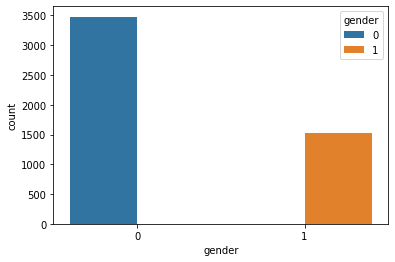

In [10]:
#성별 데이터 수
print('여성:',df1[df1['gender']==0].gender.count())
print('남성:',df1[df1['gender']==1].gender.count())
#그래프로 표현
sns.countplot(x="gender", hue="gender", data=df1)

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


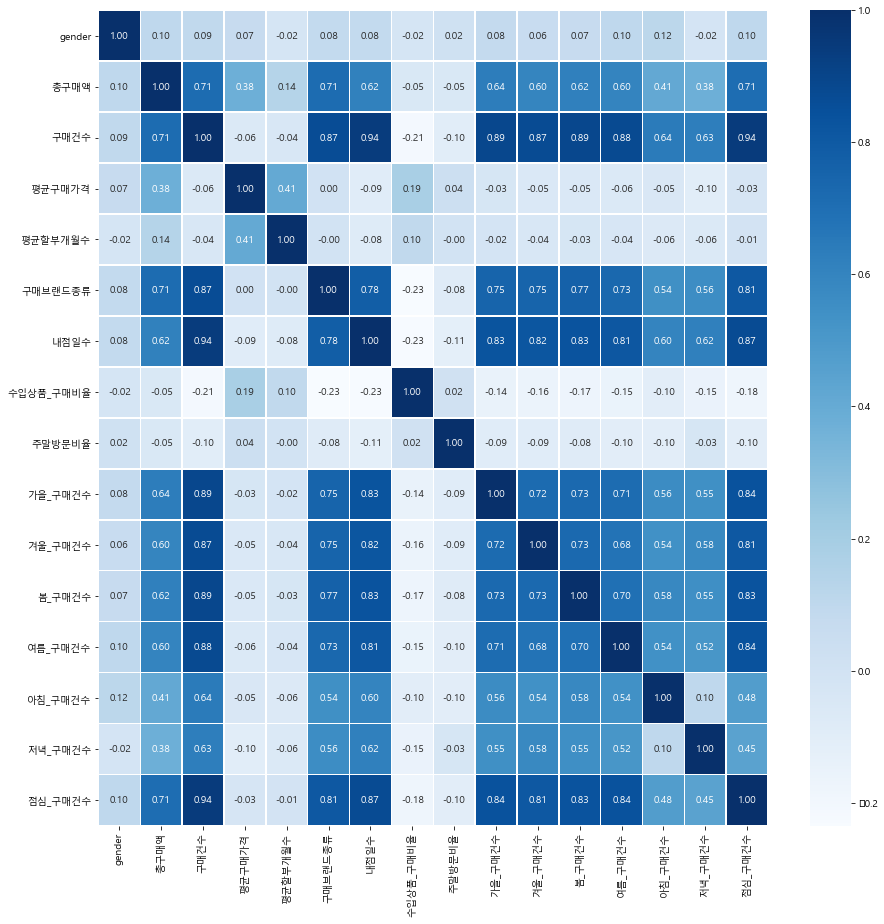

In [11]:
#상관관계 확인
corr = df1.corr()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,15))
sns.heatmap(data = corr, annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

- 예측하고자 하는 성별 변수는 다른 변수들과 독립적임 따라서 통계분석 이론을 적용 가능하다.

- 총구매액: 구매건수, 구매브랜드종류, 점심_구매건수와 강한 상관관계를 가진다.
- 구매건수: 총구매액, 구매브랜드종류, 내점일수, 계절별 구매건수, 점심_구매건수와 강한 상관관계를 가진다.
- 내점일수: 평균구매가격, 평균할부개월수, 수입상품_구입비율, 주말방문비율을 제외한 변수와 상관관계를 가진다.
- 평균구매가격, 평균할부개월수, 수입상품_구입비율, 주말방문비율은 다른 변수들과 서로 독립적이다.

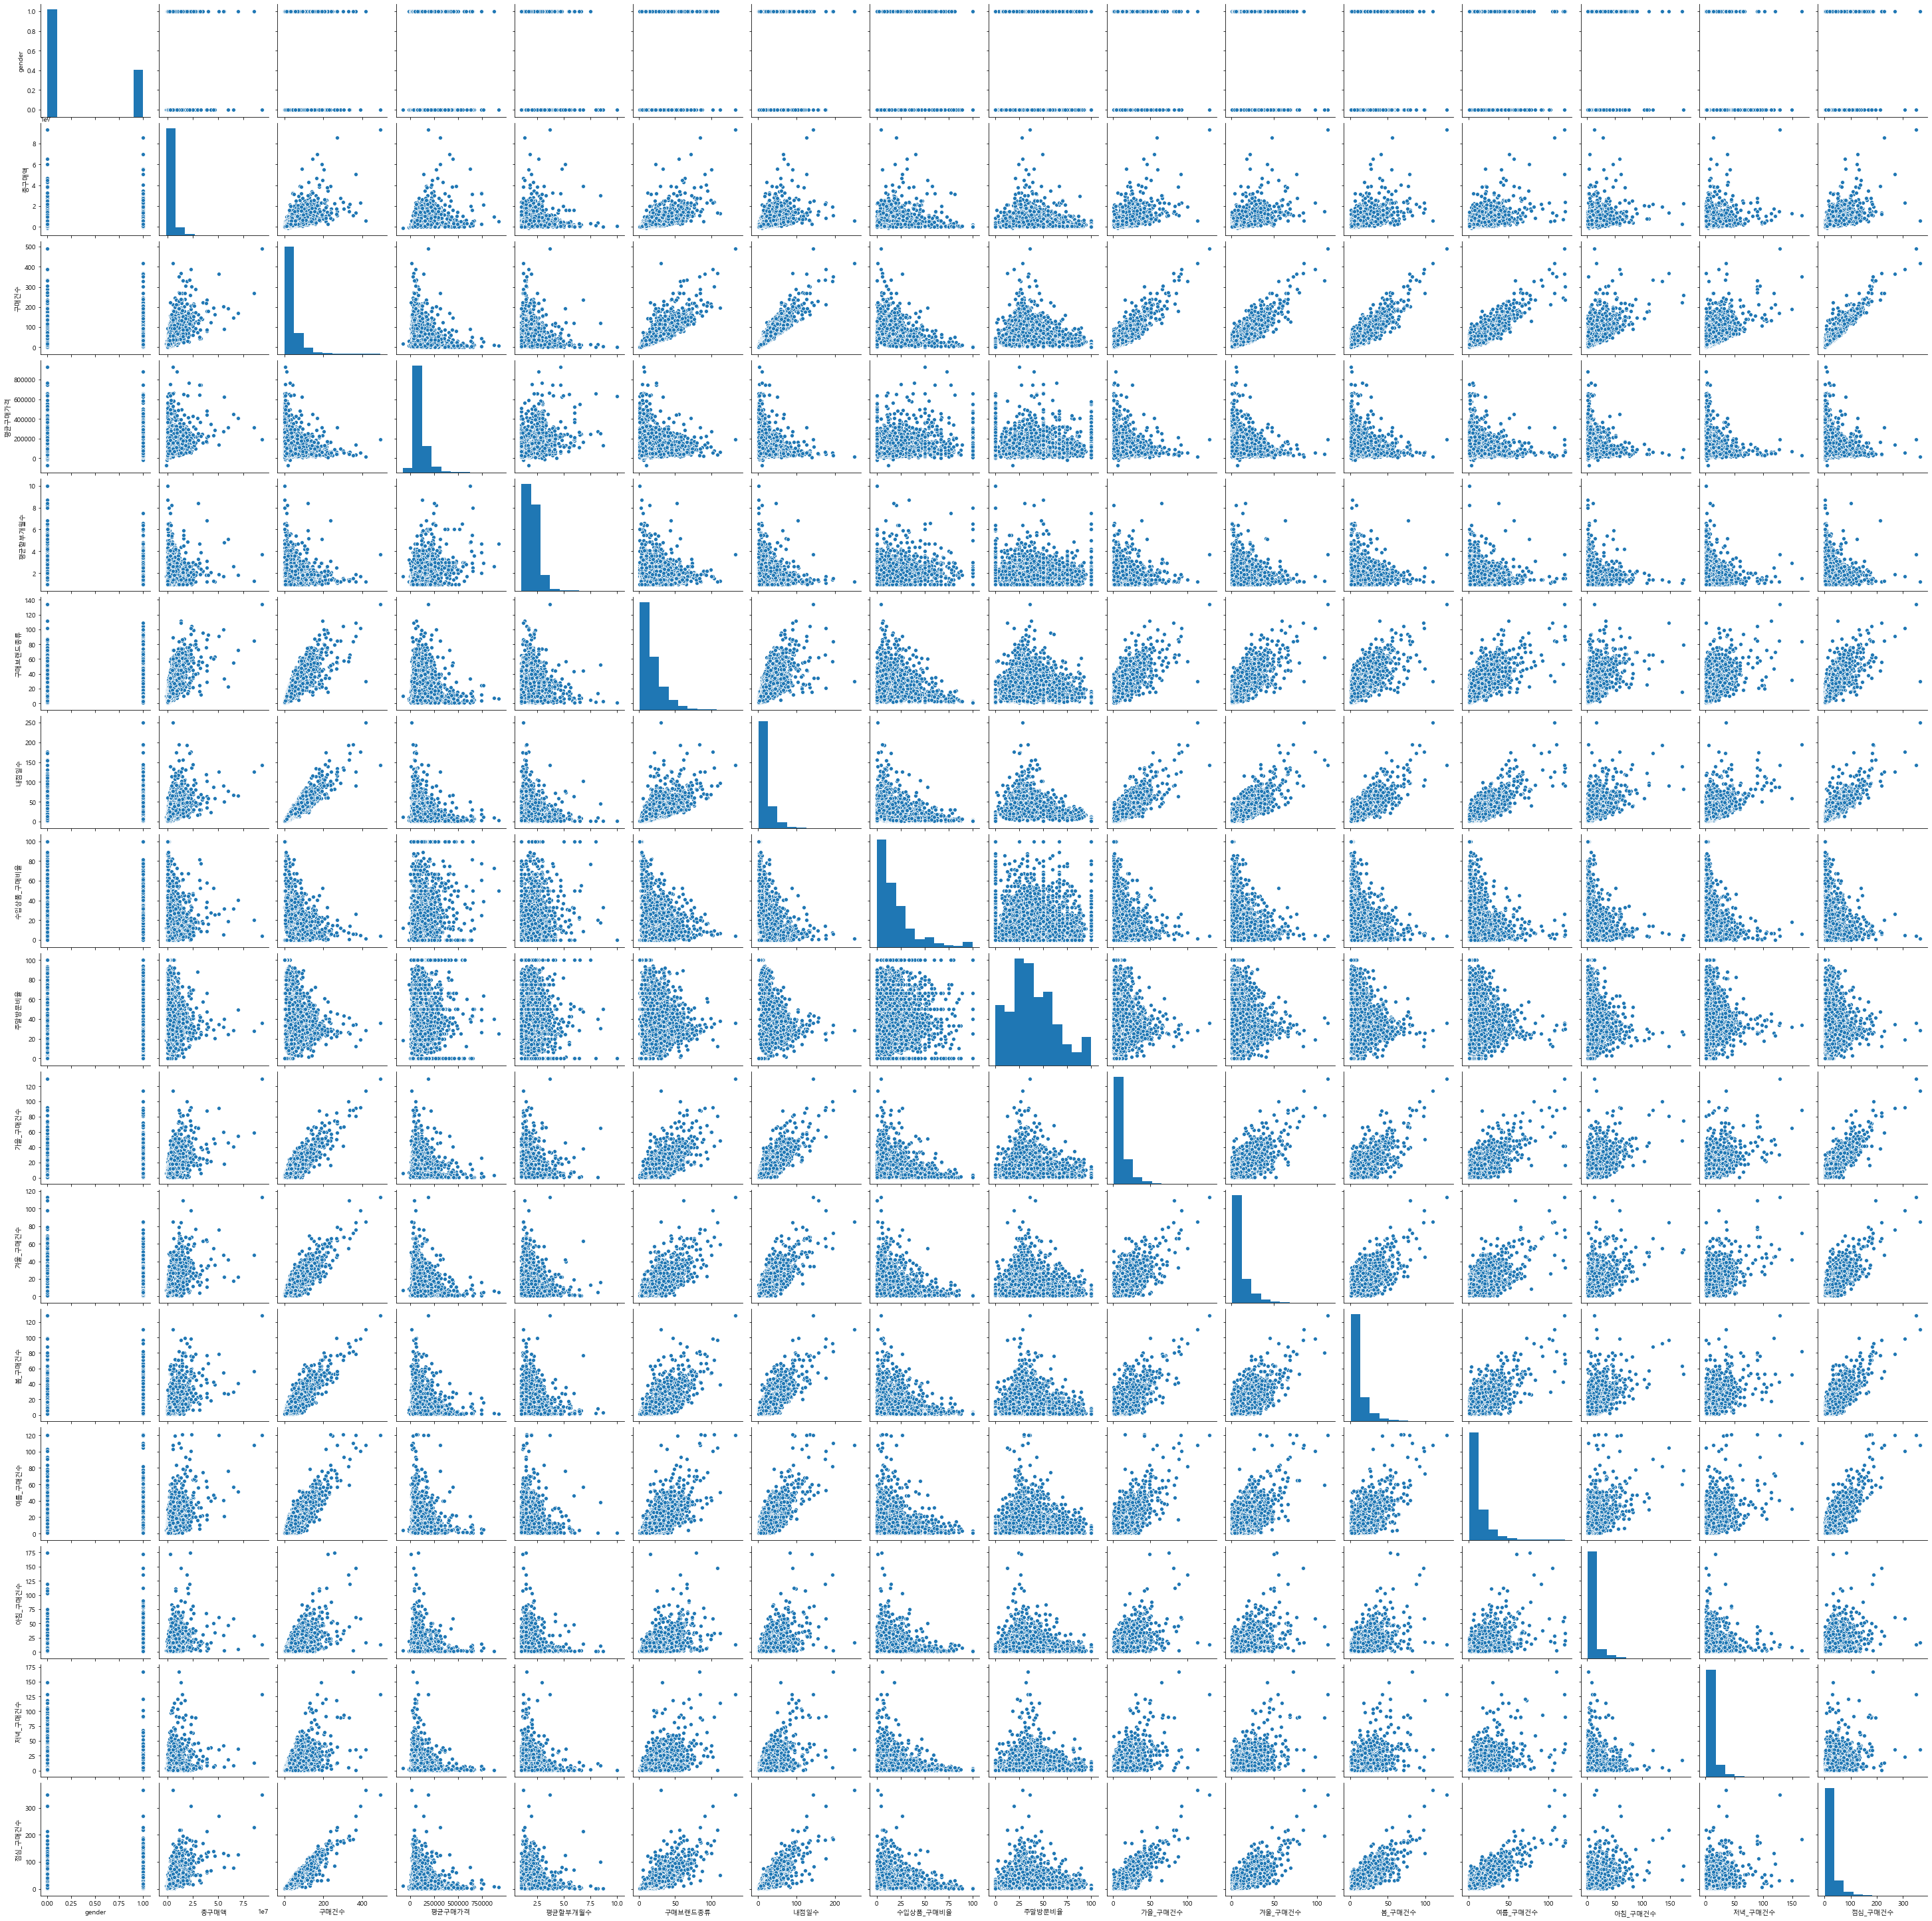

In [17]:
#각 컬럼 별 산포도 그래프
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 지정
sns_plot = sns.pairplot(df1,hue = 'gender')
plt.show()

- 상관관계분석에서 강한 상관관계를 가진 변수들은 산포도 그래프에서도 선형이다.
- 성별에 따른 명확한 차이를 확인 할 수 없다.

#### 범주형변수처리
- 주구매코너가 24개 속성으로 한번에 one-hot인코딩 하기엔 속성값이 많다.
- 각 항목별로 고객들의 성비가 다를것이므로 이를 바탕으로 그룹 생성
- 주관적인 견해를 줄이기 위해 나중에 K-means Clustering을 이용해 군집화

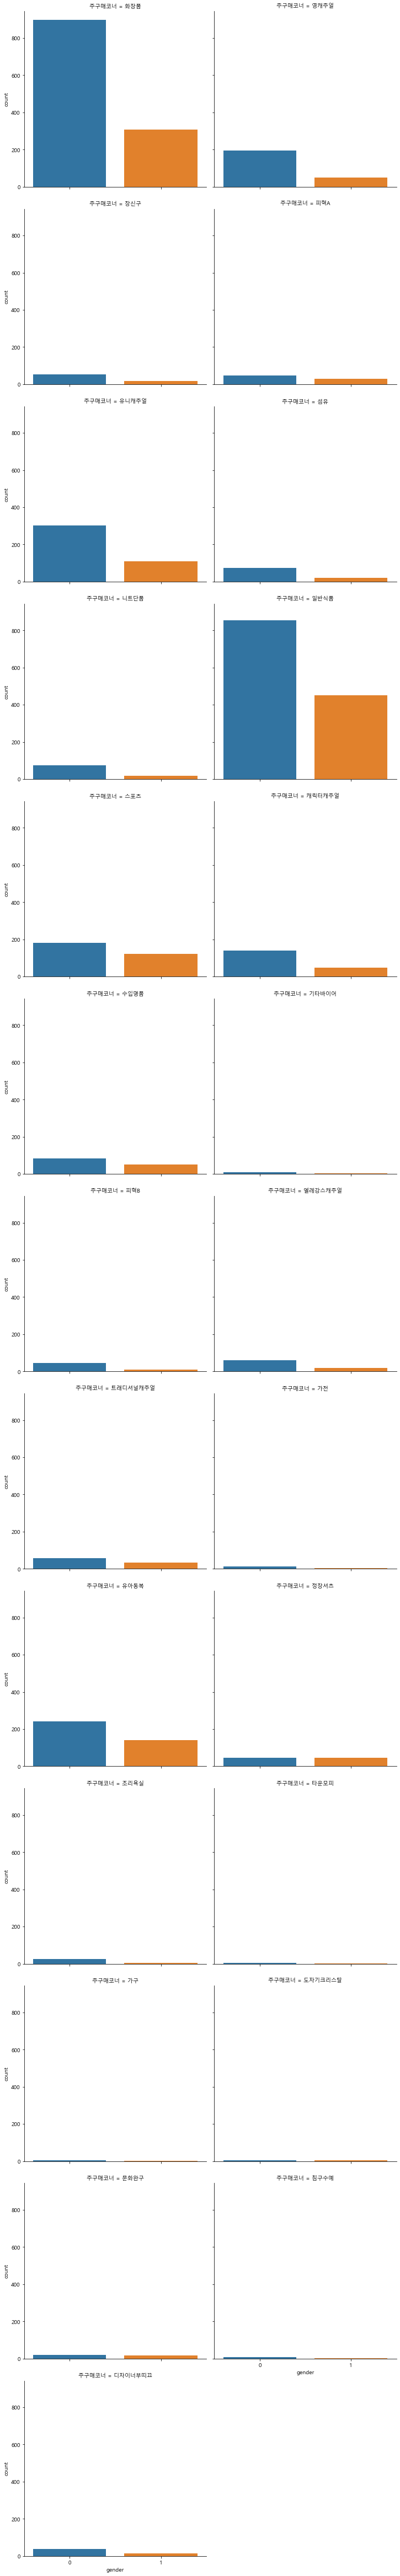

In [18]:
#주구매코너 항목별 성별수
sns.catplot('gender', col='주구매코너', data=df1, kind='count', col_wrap=2)
plt.show()

In [19]:
#주구매코너 각 항목별 남성비를 수치로 표현
d1 = df1.groupby('주구매코너').agg("sum").gender
d2 = df1.groupby('주구매코너').agg("count").gender
d = pd.concat([d1,d2],axis=1)
d.columns = ['남성수','전체고객수']
d['남성비율'] = d.iloc[:,0]/d.iloc[:,1]
d.sort_values('남성비율')

,남성수,전체고객수,남성비율
주구매코너,,,
침구수예,1,8,0.125000
가구,1,7,0.142857
조리욕실,4,28,0.142857
피혁B,10,56,0.178571
니트단품,17,91,0.186813
영캐주얼,50,246,0.203252
섬유,21,96,0.218750
엘레강스캐주얼,18,78,0.230769
장신구,16,68,0.235294


In [20]:
"""
정렬된 데이터 데이터 증가값이 가장큰 가전-타운모피(0.056증가)를 기준으로 
침구부터 가전까지 항목을 col1 변수에 저장
"""
col1 = list(d.sort_values('남성비율').index[:15])
col1

['침구수예',
 '가구',
 '조리욕실',
 '피혁B',
 '니트단품',
 '영캐주얼',
 '섬유',
 '엘레강스캐주얼',
 '장신구',
 '기타바이어',
 '화장품',
 '디자이너부띠끄',
 '캐릭터캐주얼',
 '유니캐주얼',
 '가전']

## feature engineering

In [21]:
#df2 변수에 train 데이터 복사
df2 = train.copy()

#결측치를 0으로 대체
df2 = df2.fillna(0)

#음수값 양수로 변환
outlier_index = df2[df2['총구매액']<0].index
df2.iloc[outlier_index,[2,4]] = -df2.iloc[outlier_index,[2,4]]

#### column 추가

In [22]:


#내점일당 시간구매 건수
df2['저녁/내점'] = df2['저녁_구매건수']/df2['내점일수']
df2['점심/내점'] = df2['점심_구매건수']/df2['내점일수']
df2['아침/내점'] = df2['아침_구매건수']/df2['내점일수']
#주말방문횟수
df2['주말방문횟수'] = df2['주말방문비율'] * df2['내점일수'] / 100
#주말구매금액
df2['주말구매금액'] = df2['주말방문비율'] * df2['총구매액']
#평균할부금액
df2['평균할부금액'] = df2['총구매액'] / df2['평균할부개월수']
#내점일당 구매건수
df2['구매건수/내점'] = df2['구매건수'] / df2['내점일수']
#내점일당평균구매액
df2['평균구매액/내점'] = df2['평균구매가격'] / df2['내점일수']

#내점일당 수입상품구매비율
df2['수입상품비율/내점'] = df2['수입상품_구매비율'] * df2['구매건수/내점'] / 100
#주구매코너를 위에서 col1에 저장한 항목별로 0,1로 분류 (주구매코너가 col1이면 0)
df2['주구매코너'] = df2['주구매코너'].apply(lambda x: 0 if x in col1 else 1)

#시간별구매액
df2['아침구매액'] = df2['평균구매가격']*df2['아침_구매건수']
df2['점심구매액'] = df2['평균구매가격']*df2['점심_구매건수']
df2['저녁구매액'] = df2['평균구매가격']*df2['저녁_구매건수']

#계절별 구매액
df2['봄구매액'] = df2['평균구매가격']*df2['봄_구매건수']
df2['여름구매액'] = df2['평균구매가격']*df2['여름_구매건수']
df2['가을구매액'] = df2['평균구매가격']*df2['가을_구매건수']
df2['겨울구매액'] = df2['평균구매가격']*df2['겨울_구매건수']

#불필요한 컬럼 제거
df2= df2.drop(['custid'],axis=1)



#### StandardScaler 적용

In [23]:
# 연속형 데이터만 표준화 적용
col = ['총구매액','평균구매가격','평균할부금액','주말구매금액', '평균구매액/내점']
standard = StandardScaler()
df2[col] = standard.fit(df2[col]).transform(df2[col])

#### 오버샘플링
- 남성인 경우가 적어서 적절한 학습을 위해 남성 데이터를 오버 샘플링

In [24]:
X = df2.drop(['gender','가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','저녁_구매건수','점심_구매건수','아침_구매건수','주구매코너'],axis=1)
y = df2['gender']

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

#### 학습, 테스트 데이터 분리

In [25]:
#테스트 사이즈 0.3
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3, random_state=1)


## Modeling

- k-fold 로 cross validation 진행

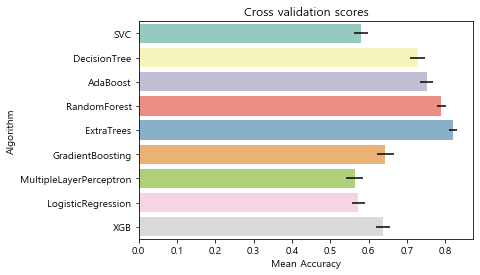

In [21]:
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(XGBClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","LogisticRegression",'XGB']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

- ExtraTrees와 RandomForest 선택
- 추가로 GridSerchCV를 사용하여 XGboost 모델 개선


In [28]:
ETC = ExtraTreesClassifier(n_estimators=100, random_state=random_state,n_jobs=4)
ETC.fit(X_train, y_train).score(X_test,y_test)
pred = ETC.predict(X_test)
print('Extratree')
print('accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('precision: {:.3f}'.format(precision_score(y_test,pred)))
print('recall: {:.3f}'.format(recall_score(y_test,pred)))
print('f1: {:.3f}'.format(f1_score(y_test,pred)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test,pred)))
confusion_matrix(y_test,pred)

Extratree
accuracy: 0.847
precision: 0.879
recall: 0.808
f1: 0.842
roc_auc: 0.848


array([[918, 117],
       [202, 851]], dtype=int64)

In [32]:
ETC.score(X_test,y_test)

0.8472222222222222

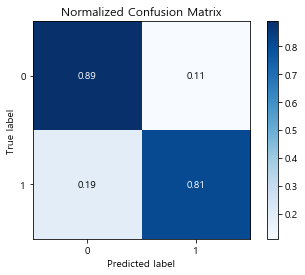

In [23]:
skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
plt.show()

In [24]:
RF = RandomForestClassifier(n_estimators=100,random_state=random_state,n_jobs=4)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
print('RandomForest')
print('accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('precision: {:.3f}'.format(precision_score(y_test,pred)))
print('recall: {:.3f}'.format(recall_score(y_test,pred)))
print('f1: {:.3f}'.format(f1_score(y_test,pred)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test,pred)))
confusion_matrix(y_test,pred)

RandomForest
accuracy: 0.822
precision: 0.813
recall: 0.840
f1: 0.826
roc_auc: 0.822


array([[831, 204],
       [168, 885]], dtype=int64)

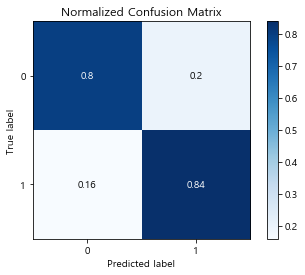

In [25]:
skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
plt.show()

In [64]:
'''
xgb_clf = XGBClassifier(n_estimators=100,random_state=random_state,n_jobs=4)

params = {'max_depth':[3,5,7,9],'min_child_weight':[3,5,7,9],
         'colsample_bytree':[0.5,0.75,1.0]}

# XGBoost의 최적의 파라미터를 찾고
# 최적의 파라미터를 포함하는 XGBoost 객체를 생성
# GridSearchCV 객체 생성
gridcv = GridSearchCV(xgb_clf,param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30,
          eval_metric='error',#error select BEST
           eval_set = [(X_train,y_train),(X_test,y_test)])
'''

"\nxgb_clf = XGBClassifier(n_estimators=100,random_state=random_state,n_jobs=4)\n\nparams = {'max_depth':[3,5,7,9],'min_child_weight':[3,5,7,9],\n         'colsample_bytree':[0.5,0.75,1.0]}\n\n# XGBoost의 최적의 파라미터를 찾고\n# 최적의 파라미터를 포함하는 XGBoost 객체를 생성\n# GridSearchCV 객체 생성\ngridcv = GridSearchCV(xgb_clf,param_grid=params)\ngridcv.fit(X_train, y_train, early_stopping_rounds = 30,\n          eval_metric='error',#error select BEST\n           eval_set = [(X_train,y_train),(X_test,y_test)])\n"

In [27]:
gridcv.best_params_

{'colsample_bytree': 0.75, 'max_depth': 9, 'min_child_weight': 3}

In [28]:
pred = gridcv.predict(X_test)
print('XGB')
print('accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('precision: {:.3f}'.format(precision_score(y_test,pred)))
print('recall: {:.3f}'.format(recall_score(y_test,pred)))
print('f1: {:.3f}'.format(f1_score(y_test,pred)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test,pred)))
confusion_matrix(y_test,pred)

XGB
accuracy: 0.783
precision: 0.766
recall: 0.820
f1: 0.792
roc_auc: 0.782


array([[771, 264],
       [190, 863]], dtype=int64)

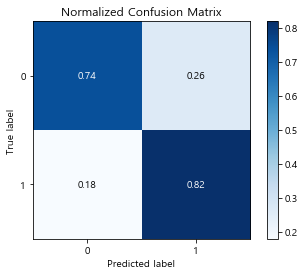

In [29]:
skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
plt.show()

- 가장 높은 정확도는 ExtraTrees

In [30]:
# roc 시각화
def rocvis(true , prob , label ) :
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(true, prob)
    plt.plot(fpr, tpr, marker='.', label = label  )

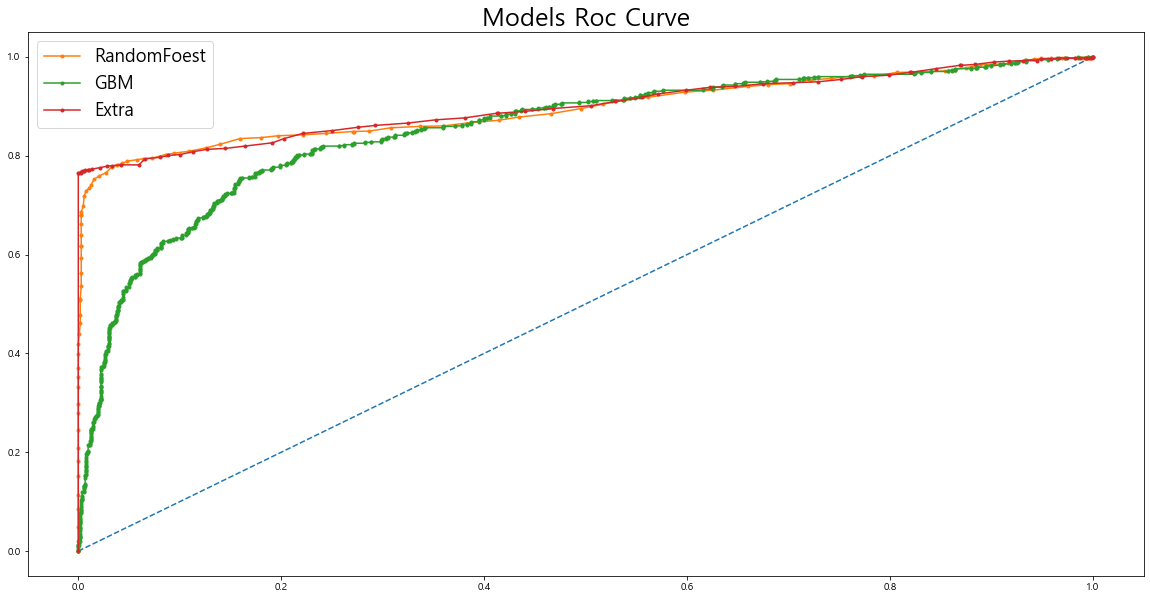

In [31]:
fig , ax = plt.subplots(figsize= (20,10))
plt.plot([0, 1], [0, 1], linestyle='--')
rocvis(np.array(y_test) , RF.predict_proba(X_test)[:,1] , "RandomFoest")
rocvis(np.array(y_test) , gridcv.predict_proba(X_test)[:,1] , "GBM")
rocvis(np.array(y_test) , ETC.predict_proba(X_test)[:,1] , "Extra")
plt.legend(fontsize = 18)
plt.title("Models Roc Curve" , fontsize= 25)
plt.show()

## 실제 예측

In [32]:
test = pd.read_csv('test.csv',encoding='cp949')
df = test.copy()
df = df.fillna(0)

In [33]:
def feature(df2,col1):
    outlier_index = df2[df2['총구매액']<0].index
    df2.iloc[outlier_index,[2,4]] = -df2.iloc[outlier_index,[2,4]]
    df2['저녁/내점'] = df2['저녁_구매건수']/df2['내점일수']
    df2['점심/내점'] = df2['점심_구매건수']/df2['내점일수']
    df2['아침/내점'] = df2['아침_구매건수']/df2['내점일수']
    df2['주말방문횟수'] = df2['주말방문비율'] * df2['내점일수'] / 100
    df2['주말구매금액'] = df2['주말방문비율'] * df2['총구매액']
    df2['평균할부금액'] = df2['총구매액'] / df2['평균할부개월수']
    df2['구매건수/내점'] = df2['구매건수'] / df2['내점일수']
    df2['평균구매액/내점'] = df2['평균구매가격'] / df2['내점일수']
    df2['수입상품비율/내점'] = df2['수입상품_구매비율'] * df2['구매건수/내점'] / 100
    df2['주구매코너'] = df2['주구매코너'].apply(lambda x: 0 if x in col1 else 1)
    df2['아침구매액'] = df2['평균구매가격']*df2['아침_구매건수']
    df2['점심구매액'] = df2['평균구매가격']*df2['점심_구매건수']
    df2['저녁구매액'] = df2['평균구매가격']*df2['저녁_구매건수']
    df2['봄구매액'] = df2['평균구매가격']*df2['봄_구매건수']
    df2['여름구매액'] = df2['평균구매가격']*df2['여름_구매건수']
    df2['가을구매액'] = df2['평균구매가격']*df2['가을_구매건수']
    df2['겨울구매액'] = df2['평균구매가격']*df2['겨울_구매건수']

    df2= df2.drop(['custid'],axis=1)
    col = ['총구매액','평균구매가격','평균할부금액','주말구매금액', '평균구매액/내점']
    standard = StandardScaler()
    df2[col] = standard.fit(df2[col]).transform(df2[col])
    
    df2 = df2.drop(['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','저녁_구매건수','점심_구매건수','아침_구매건수','주구매코너'],axis=1)

    return df2



In [34]:
X = feature(df,col1)

In [35]:
ETC.predict(X).sum()

570

In [40]:
test_gender1 =pd.DataFrame(ETC.predict(X))
test_submission1 = pd.concat([test['custid'],test_gender1],axis=1)
test_submission1.columns = ['custid','gender']
test_submission1.to_csv('gender1.csv',encoding='cp949',index=False)

## AutoEncoder

- AutoEncoder 비지도학습으로 y값 없이 X값들의 특징을 파악
- AutoEncoder로 파생변수를 생성

In [41]:
import tensorflow as tf
from IPython.display import clear_output
import time

In [42]:
df3 = train.copy()
df3 = df3.fillna(0)
outlier_index = df3[df3['총구매액']<0].index
df3.iloc[outlier_index,[2,4]] = -df3.iloc[outlier_index,[2,4]]

df3 = feature(df3,col1)
col = ['봄구매액','여름구매액','가을구매액','겨울구매액','아침구매액','점심구매액','저녁구매액']
standard = StandardScaler()
df3[col] = standard.fit(df3[col]).transform(df3[col])

X_Auto, test_X_Auto = train_test_split(df3.drop(['gender'],axis=1),test_size=0.3, random_state=1)

Epoch : 4999 , Train AVG MSE Loss : 4.0843 , Test MSE : 4.9087


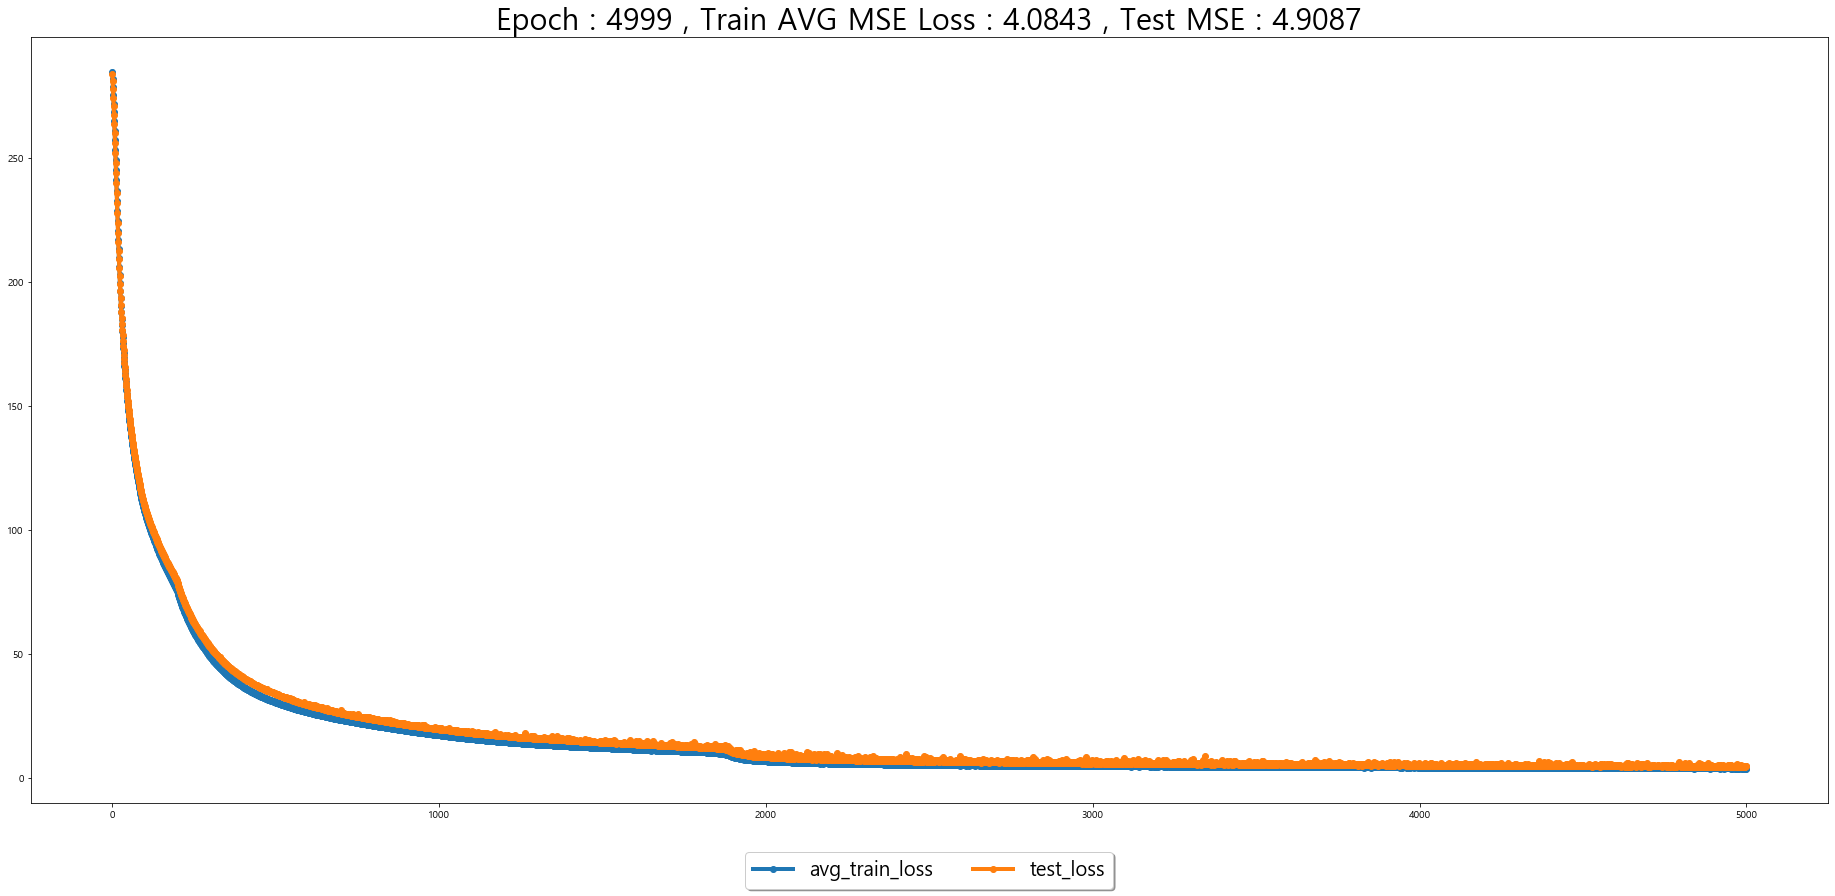

In [43]:


input_ = tf.placeholder(tf.float32 , [None , X_Auto.shape[1]])
E_layer = tf.layers.dense(input_ , units=int(X_Auto.shape[1]/2) , activation= tf.nn.sigmoid )
encoding = tf.layers.dense(E_layer , int(X_Auto.shape[1]/8) , activation= tf.nn.sigmoid )
D_layer = tf.layers.dense(encoding , int(X_Auto.shape[1]/2) , activation= tf.nn.sigmoid )
Decoding = tf.layers.dense(D_layer , X_Auto.shape[1] , activation= None)
cost = tf.reduce_mean(tf.pow( input_ - Decoding , 2))
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)


## modeling
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_size = 100
output = pd.DataFrame({"iter" : [0] , "train_loss" : [0] , "test_loss" : [0] })
for epoch in range(5000) :
    total_cost = 0
    batch_idx = np.arange(X_Auto.shape[0])
    np.random.shuffle(batch_idx)
    for n in range( 0 , (X_Auto.shape[0]// batch_size) * batch_size , batch_size) :
        idx = batch_idx[n:n+batch_size]
        batch_inputs = X_Auto.iloc[idx,:]
        _ , mse_loss = sess.run([optimizer ,cost] ,
                                feed_dict = {input_ : batch_inputs})
        total_cost += mse_loss
    avg_loss = total_cost / (X_Auto.shape[0]// batch_size)
    test_mse = sess.run(cost , feed_dict = {input_ : test_X_Auto})
    if output.test_loss.min() > test_mse :
        train_encoding = sess.run(encoding , feed_dict={input_ : X_Auto})
        test_encoding = sess.run(encoding , feed_dict={input_ : test_X_Auto})
        encoding_var = np.concatenate((np.array(train_encoding) , 
                                       np.array(test_encoding)), axis = 0)
        np.save("AutoEncoder_Latent.npy" , encoding_var )
    output1 = pd.DataFrame({"iter" : [epoch] , "train_loss" : [avg_loss] , "test_loss" : [test_mse] })
    output  = output.append(output1)
    clear_output(wait= True)
    output = output[output.iter>0]
    chr_ = "Epoch : {} , Train AVG MSE Loss : {:.4f} , Test MSE : {:.4f}".format(epoch , avg_loss , test_mse )
    print(chr_)
fig , ax = plt.subplots(figsize = (26,13))
fig.subplots_adjust(top = 0.95 , left = 0.03 , bottom = 0.04 , right = 0.99)
ax.plot(output.iter , output.train_loss , label ="avg_train_loss" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
ax.plot(output.iter , output.test_loss , label ="test_loss" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
ax.set_title(chr_, fontsize= 30)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4 , fontsize= 20)    
plt.show()

In [44]:
X_Auto = pd.concat([df3.drop('gender',axis=1), pd.DataFrame(list(encoding_var))],axis=1)


y = df2['gender']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_Auto, y)

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3, random_state=1)

In [65]:
'''
xgb_clf = XGBClassifier(n_estimators=100,random_state=random_state,n_jobs=4)

params = {'max_depth':[3,5,7,9],'min_child_weight':[3,5,7,9],
         'colsample_bytree':[0.5,0.75,1.0]}

# XGBoost의 최적의 파라미터를 찾고
# 최적의 파라미터를 포함하는 XGBoost 객체를 생성
# GridSearchCV 객체 생성
gridcv = GridSearchCV(xgb_clf,param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30,
          eval_metric='error',#error select BEST
           eval_set = [(X_train,y_train),(X_test,y_test)])
print('final params', gridcv.best_params_)
print('best score', gridcv.best_score_)
'''


"\nxgb_clf = XGBClassifier(n_estimators=100,random_state=random_state,n_jobs=4)\n\nparams = {'max_depth':[3,5,7,9],'min_child_weight':[3,5,7,9],\n         'colsample_bytree':[0.5,0.75,1.0]}\n\n# XGBoost의 최적의 파라미터를 찾고\n# 최적의 파라미터를 포함하는 XGBoost 객체를 생성\n# GridSearchCV 객체 생성\ngridcv = GridSearchCV(xgb_clf,param_grid=params)\ngridcv.fit(X_train, y_train, early_stopping_rounds = 30,\n          eval_metric='error',#error select BEST\n           eval_set = [(X_train,y_train),(X_test,y_test)])\nprint('final params', gridcv.best_params_)\nprint('best score', gridcv.best_score_)\n"

XGB
accuracy: 0.793
precision: 0.772
recall: 0.835
f1: 0.802
roc_auc: 0.792


<function matplotlib.pyplot.show(*args, **kw)>

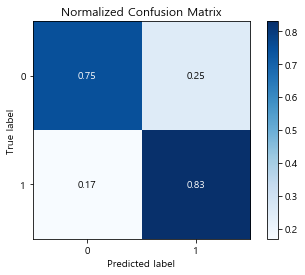

In [46]:
pred = gridcv.predict(X_test)
print('XGB')
print('accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('precision: {:.3f}'.format(precision_score(y_test,pred)))
print('recall: {:.3f}'.format(recall_score(y_test,pred)))
print('f1: {:.3f}'.format(f1_score(y_test,pred)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test,pred)))
skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
plt.show

RandomForest
accuracy: 0.816
precision: 0.814
recall: 0.822
f1: 0.818
roc_auc: 0.816


<function matplotlib.pyplot.show(*args, **kw)>

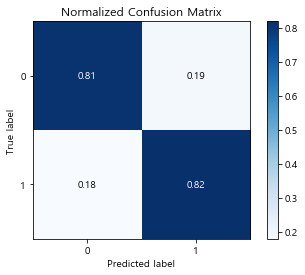

In [47]:
RF = RandomForestClassifier(n_estimators=100,random_state=random_state,n_jobs=4)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
print('RandomForest')
print('accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('precision: {:.3f}'.format(precision_score(y_test,pred)))
print('recall: {:.3f}'.format(recall_score(y_test,pred)))
print('f1: {:.3f}'.format(f1_score(y_test,pred)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test,pred)))
skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
plt.show

ExtraTree
accuracy: 0.852
precision: 0.897
recall: 0.797
f1: 0.844
roc_auc: 0.852


<function matplotlib.pyplot.show(*args, **kw)>

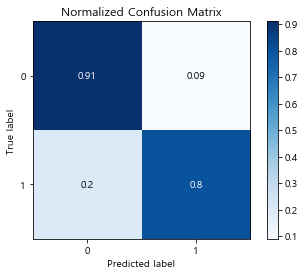

In [48]:
ETC = ExtraTreesClassifier(n_estimators=100, random_state=random_state,n_jobs=4)
ETC.fit(X_train, y_train).score(X_test,y_test)
pred = ETC.predict(X_test)
print('ExtraTree')
print('accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('precision: {:.3f}'.format(precision_score(y_test,pred)))
print('recall: {:.3f}'.format(recall_score(y_test,pred)))
print('f1: {:.3f}'.format(f1_score(y_test,pred)))
print('roc_auc: {:.3f}'.format(roc_auc_score(y_test,pred)))
skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
plt.show

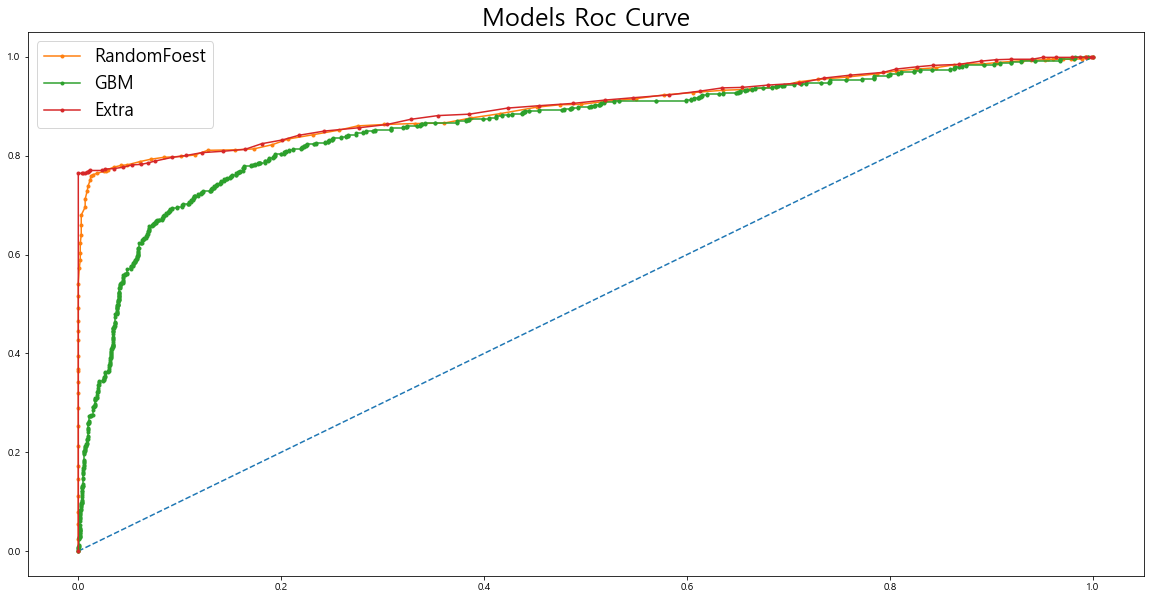

In [49]:
fig , ax = plt.subplots(figsize= (20,10))
plt.plot([0, 1], [0, 1], linestyle='--')
rocvis(np.array(y_test) , RF.predict_proba(X_test)[:,1] , "RandomFoest")
rocvis(np.array(y_test) , gridcv.predict_proba(X_test)[:,1] , "GBM")
rocvis(np.array(y_test) , ETC.predict_proba(X_test)[:,1] , "Extra")
plt.legend(fontsize = 18)
plt.title("Models Roc Curve" , fontsize= 25)
plt.show()

## 예측

In [50]:
df_auto = test.copy()
df_auto = df_auto.fillna(0)
outlier_index = df_auto[df_auto['총구매액']<0].index
df_auto.iloc[outlier_index,[2,4]] = -df_auto.iloc[outlier_index,[2,4]]

df_auto = feature(df_auto,col1)
col = ['봄구매액','여름구매액','가을구매액','겨울구매액','아침구매액','점심구매액','저녁구매액']
standard = StandardScaler()
df_auto[col] = standard.fit(df_auto[col]).transform(df_auto[col])
X_Auto, test_X_Auto = train_test_split(df_auto,test_size=0.3, random_state=1)

Epoch : 4999 , Train AVG MSE Loss : 5.1099 , Test MSE : 4.8024


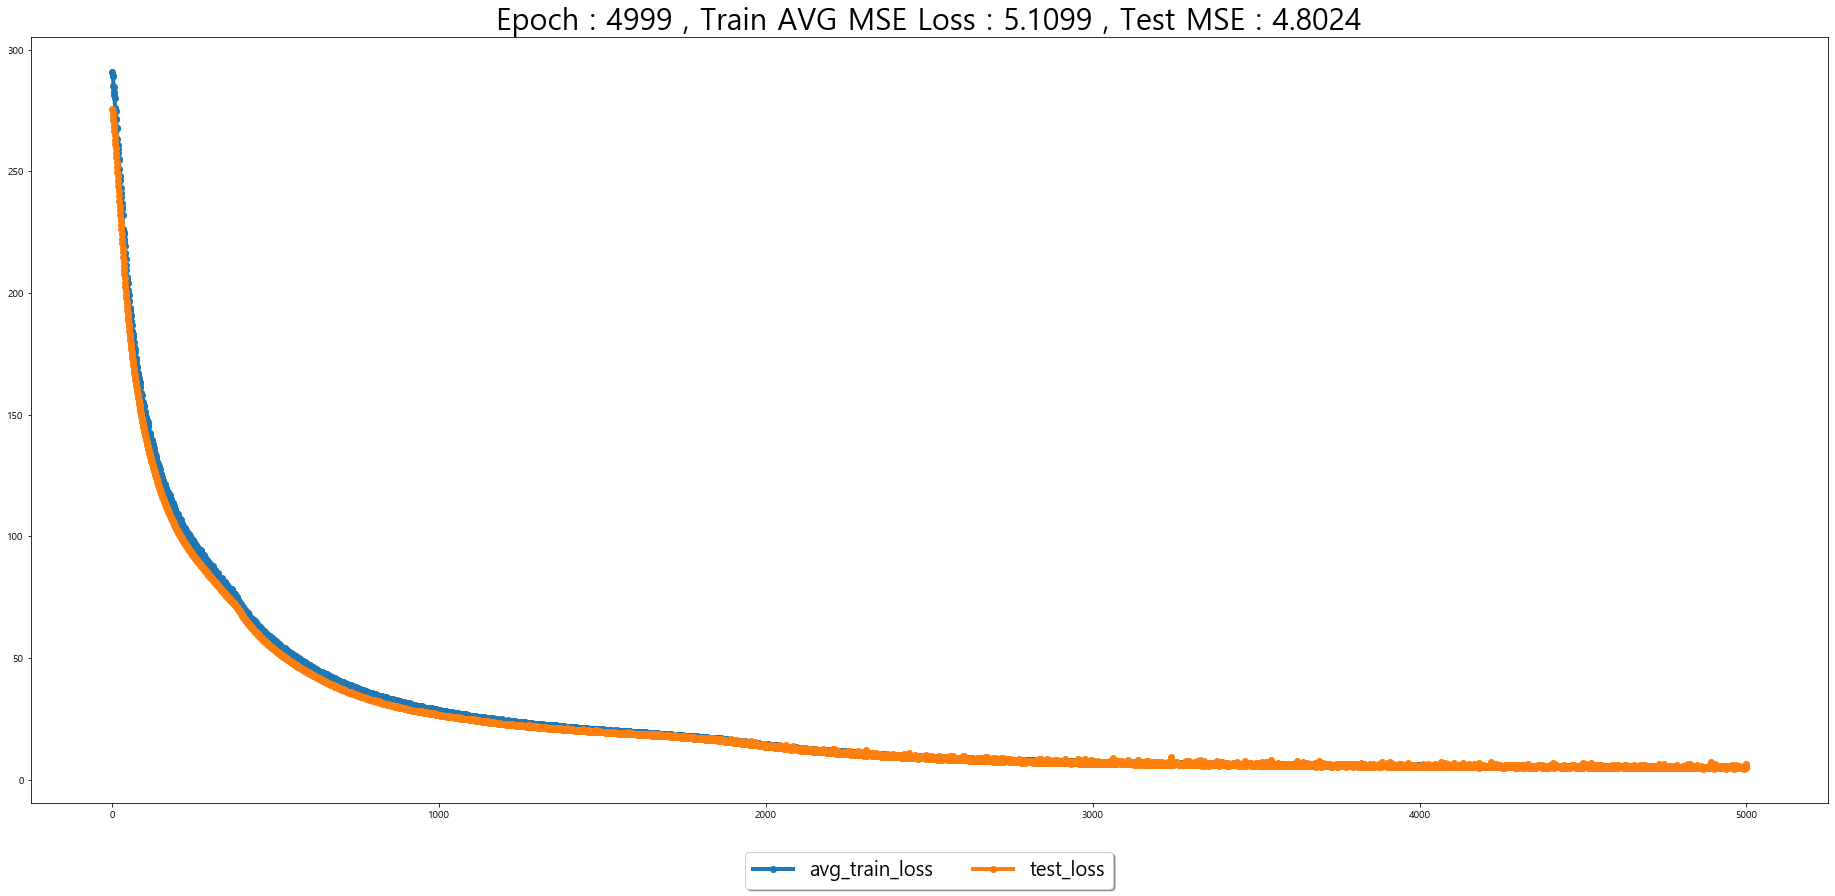

In [51]:


input_ = tf.placeholder(tf.float32 , [None , X_Auto.shape[1]])
E_layer = tf.layers.dense(input_ , units=int(X_Auto.shape[1]/2) , activation= tf.nn.sigmoid )
encoding = tf.layers.dense(E_layer , int(X_Auto.shape[1]/8) , activation= tf.nn.sigmoid )
D_layer = tf.layers.dense(encoding , int(X_Auto.shape[1]/2) , activation= tf.nn.sigmoid )
Decoding = tf.layers.dense(D_layer , X_Auto.shape[1] , activation= None)
cost = tf.reduce_mean(tf.pow( input_ - Decoding , 2))
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)


## modeling
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_size = 200
output = pd.DataFrame({"iter" : [0] , "train_loss" : [0] , "test_loss" : [0] })
for epoch in range(5000) :
    total_cost = 0
    batch_idx = np.arange(X_Auto.shape[0])
    np.random.shuffle(batch_idx)
    for n in range( 0 , (X_Auto.shape[0]// batch_size) * batch_size , batch_size) :
        idx = batch_idx[n:n+batch_size]
        batch_inputs = X_Auto.iloc[idx,:]
        _ , mse_loss = sess.run([optimizer ,cost] ,
                                feed_dict = {input_ : batch_inputs})
        total_cost += mse_loss
    avg_loss = total_cost / (X_Auto.shape[0]// batch_size)
    test_mse = sess.run(cost , feed_dict = {input_ : test_X_Auto})
    if output.test_loss.min() > test_mse :
        train_encoding = sess.run(encoding , feed_dict={input_ : X_Auto})
        test_encoding = sess.run(encoding , feed_dict={input_ : test_X_Auto})
        encoding_var = np.concatenate((np.array(train_encoding) , 
                                       np.array(test_encoding)), axis = 0)
        np.save("AutoEncoder_Latent.npy" , encoding_var )
    output1 = pd.DataFrame({"iter" : [epoch] , "train_loss" : [avg_loss] , "test_loss" : [test_mse] })
    output  = output.append(output1)
    clear_output(wait= True)
    output = output[output.iter>0]
    chr_ = "Epoch : {} , Train AVG MSE Loss : {:.4f} , Test MSE : {:.4f}".format(epoch , avg_loss , test_mse )
    print(chr_)
fig , ax = plt.subplots(figsize = (26,13))
fig.subplots_adjust(top = 0.95 , left = 0.03 , bottom = 0.04 , right = 0.99)
ax.plot(output.iter , output.train_loss , label ="avg_train_loss" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
ax.plot(output.iter , output.test_loss , label ="test_loss" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
ax.set_title(chr_, fontsize= 30)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4 , fontsize= 20)    
plt.show()

In [52]:
X_auto = pd.concat([df_auto, pd.DataFrame(list(encoding_var))],axis=1)

In [53]:
ETC.predict(X_auto).sum()

492

In [54]:
gridcv.predict(X_auto).sum()

1225

In [55]:
RF.predict(X_auto).sum()

919

In [56]:
test_gender = pd.DataFrame(ETC.predict(X_auto))

test_submission = pd.concat([test['custid'],test_gender],axis=1)
test_submission.columns = ['custid','gender']
test_submission.to_csv('gender.csv',encoding='cp949',index=False)